In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from ambiance import Atmosphere
from shapely.geometry import LineString

In [2]:
w=580506.8
s=111.63
clmax1=1.4  #  flaps off
clmax2=2.7  #flaps on
CD0=0.0159
K=0.04244
K1=0.41065
K2=-0.3078
T0=(2*97900)
view=100

Altitude,Density,Vstall (Clmax=1.4),Vstall (Clmax=2.7)
0,1.225000,77.874653,56.076159
1,1.111660,81.748209,58.865438
2,1.006554,85.910389,61.862551
3,0.909254,90.390228,65.088403
4,0.819347,95.220475,68.566579
5,0.736429,100.438183,72.323758
6,0.660111,106.085391,76.390213
7,0.590018,112.209960,80.800406
8,0.525786,118.866551,85.593699
9,0.467063,126.117821,90.815210


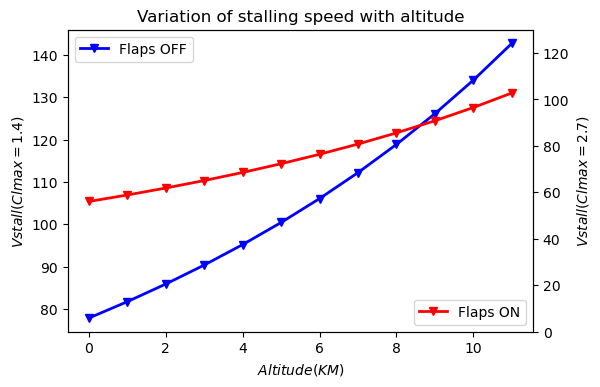

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, '$Density$')

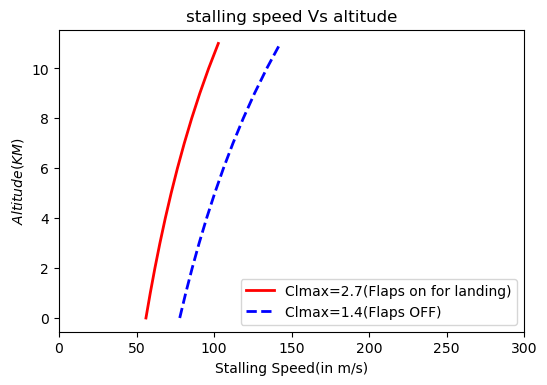

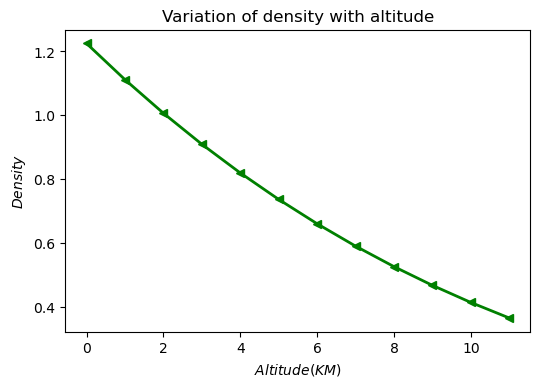

In [34]:
alt=[0,1,2,3,4,5,6,7,8,9,10,11]
rho=np.zeros(len(alt))
Vs1=np.zeros(len(alt))
Vs2=np.zeros(len(alt))
for j in alt:
    mosphere = Atmosphere(alt[j]*1000)
    
    #density at various altitudes calculations
    rho[j] = mosphere.density
    A=CD0*0.5*rho[j]*s
    B=(K*(w**2))/(rho[j]*0.5*s)
    
    #vstall at vaious altitudes
    
    Vs1[j]=((2*w)/(rho[j]*clmax1*s))**(0.5)
    Vs2[j]=((2*w)/(rho[j]*clmax2*s))**(0.5)
dfa=pd.DataFrame({ 'Altitude':alt,'Density':rho,'Vstall (Clmax=1.4)':Vs1,'Vstall (Clmax=2.7)':Vs2})




# data framestyles

DFA=dfa.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'green'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector' : '',
  'props' : [('border','2px solid green')]},
 
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'honeydew')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
]
).hide_index()
display(DFA)


#plotting code
fig,ax1=plt.subplots(num=1,dpi=view)
ax1.set_xlabel('$Altitude(KM)$')
ax1.set_ylabel('$Vstall (Clmax=1.4)$')
ax1.plot(alt,Vs1,label='Flaps OFF',linewidth=2,color='blue',marker='v')
ax2=ax1.twinx()
ax2.set_ylabel('$Vstall (Clmax=2.7)$')
ax2.plot(alt,Vs2,label='Flaps ON',linewidth=2,color='red',marker='v')
#fig.tight layout()
plt.title("Variation of stalling speed with altitude")
plt.figure()
ax1.legend(loc ="upper left")
ax2.legend(loc ="lower right")
ax2.set_ylim([0, 130])

plt.show()


#method 2 to show
plt.figure(num=3,dpi=view)
plt.plot(Vs2,alt,label='Clmax=2.7(Flaps on for landing)',linewidth=2,color='red')
plt.plot(Vs1,alt,label='Clmax=1.4(Flaps OFF)',linewidth=2,color='blue',linestyle='dashed')
plt.title("stalling speed Vs altitude")
plt.ylabel('$Altitude(KM)$')
plt.xlabel('Stalling Speed(in m/s)')
plt.legend()
plt.xlim([0,300])


#printing table
 # use DFA 
# use DFA to print table
plt.figure(num=2,dpi=view)
plt.plot(alt,rho,linewidth=2,color='green',marker='<')
plt.title("Variation of density with altitude")
plt.xlabel('$Altitude(KM)$')
plt.ylabel('$Density$')





